# Rendu TMEs ML - Kevin MEETOOA

## TME 1

In [7]:
import numpy as np
from collections import Counter
import pickle
import matplotlib.pyplot as plt
try:
    import pydot  #pour l'affichage graphique d'arbres
except ImportError:
    print("Pydot non disponible pour l'affichage graphique, allez sur http://www.webgraphviz.com/ pour generer un apercu de l'arbre")

from decisiontree import *

Pydot non disponible pour l'affichage graphique, allez sur http://www.webgraphviz.com/ pour generer un apercu de l'arbre


### Chargement des données

In [2]:
#Q1.3
import  pickle
import  numpy as np
# data : tableau (films ,features), id2titles : dictionnaire  id -> titre ,
# fields : id  feature  -> nom
[data , id2titles , fields ]= pickle.load(open("imdb_extrait.pkl","rb"))
# la  derniere  colonne  est le vote
datax=data [: ,:32]
datay=np.array ([1 if x[33] >6.5  else  -1 for x in data])

In [3]:
print(len(datax))
print(data[0])
print(fields)

4587
[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0800e+02 2.0000e+00
 1.9880e+03 1.2324e+07 4.2062e+04 5.5000e+00]
{0: 'Sci-Fi', 1: 'Crime', 2: 'Romance', 3: 'Animation', 4: 'Music', 5: 'Comedy', 6: 'War', 7: 'Horror', 8: 'Film-Noir', 9: 'Adult', 10: 'News', 11: 'Reality-TV', 12: 'Thriller', 13: 'Western', 14: 'Mystery', 15: 'Short', 16: 'Talk-Show', 17: 'Drama', 18: 'Action', 19: 'Documentary', 20: 'Musical', 21: 'History', 22: 'Family', 23: 'Adventure', 24: 'Fantasy', 25: 'Game-Show', 26: 'Sport', 27: 'Biography', 28: 'Duree', 29: 'couleur', 30: 'annee', 31: 'budget', 32: 'nb_votes', 33: 'rating'}


In [4]:
def entropy(vect):
    entropie=0
    total = len(vect)
    temp = dict(Counter(vect))
    for v in temp.values():
        p = v/total
        entropie += p*np.log(p)
    return -entropie


def entropy_cond(liste):
    taille = 0
    res = 0
    for vect in liste:
        tailleVect = len(vect)
        res += tailleVect*entropie(vect)
        taille += tailleVect
    return res/taille


entropieY = entropy(datay)
print(entropieY)
res=[]
for i in range(28):
    arrayZeros=datay[np.where(datax[:,i]==0)]
    arrayOnes=datay[np.where(datax[:,i]==1)]
    entropieCond=entropy_cond([arrayZeros,arrayOnes])
    res.append(entropieCond)
print(fields[np.argmin(res)])

0.9869089469021288
Drama


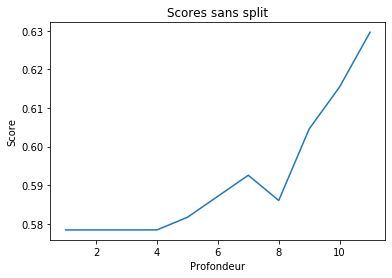

In [24]:
def plotnosplit(datax,datay):
    arrayDepths=list(range(1,12))
    dt = DecisionTree()
    arrayScore=[]
    for depth in arrayDepths:
        dt.max_depth=depth
        dt.fit(datax,datay)
        score=dt.score(datatest,labeltest)
        arrayScore.append(score)
    plt.plot(arrayDepths,arrayScore)
    plt.xlabel("Profondeur")
    plt.ylabel("Score")
    plt.title("Scores sans split")
    
plotnosplit(datax,datay)

On remarque que les scores augmentent avec la profondeur.
Cela est dû au fait que l'on évalue les performances en test avec les mêmes données qui ont servi pour l'apprentissage.

Notre modèle est donc un modèle qui apprend les données "par coeur": Cela produit un effet de sur-apprentissage.

Pour palier à ce problème, il faut séparer l'ensemble de données en deux ensembles disjoints: Un ensemble d'entraînement et un ensemble de test.

### Séparation des données en deux ensembles

In [17]:
def split(datax,datay,percentage):
    if percentage<=0 or percentage>=1:
        return
    coupe=int(len(data)*percentage)
    datatrain=datax[:coupe]
    datatest=datax[coupe:]
    labeltrain=datay[:coupe]
    labeltest=datay[coupe:]
    c = list(zip(datatrain, labeltrain))
    np.random.shuffle(c)
    trainx, trainy = zip(*c)
    c = list(zip(datatest, labeltest))
    np.random.shuffle(c)
    trainx, trainy = zip(*c)
    return datatrain,labeltrain,datatest,labeltest

In [15]:
def plot(datax,datay,percentage):
    arrayDepths=list(range(1,12))
    dt = DecisionTree()
    arrayScore=[]
    for depth in arrayDepths:
        score=0
        for i in range(3):
            datatrain,labeltrain,datatest,labeltest=split(datax,datay,percentage)
            dt.max_depth=depth
            dt.fit(datatrain,labeltrain)
            score+=dt.score(datatest,labeltest)
        score/=3
        arrayScore.append(score)
    plt.plot(arrayDepths,arrayScore,label=percentage)
    plt.xlabel("Profondeur")
    plt.ylabel("Score")
    plt.title("Comparaison des proportions train/test")
    plt.legend()

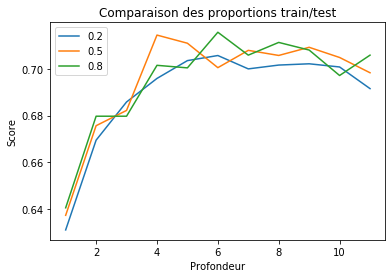

In [16]:
plot(datax,datay,0.2)
plot(datax,datay,0.5)
plot(datax,datay,0.8)

On remarque que les performances obtenues avec des ensembles d'entrainement de taille 50 et 80% (par rapport à l'ensemble des données) sont meilleures que celles obtenues avec l'ensemble de taille 20%.

Cependant, l'ensemble de taille 80% n'apporte pas de réelle amélioration par rapport à l'ensemble de taille 50%: Les performances de l'ensemble 50% sont même meilleures dans certains cas.

Ainsi, un ensemble d'entraînement de taille 50% semble être un bon compromis.

De plus, on remarque que lorsque la profondeur est trop grande (>8), les scores diminuent: Il s'agit du sur-apprentissage.
De même, une profondeur trop faible (<5) conduit à un sous-apprentissage.
Il faut donc trouver un bon compromis entre sous-apprentissage et sur-apprentissage. Une profondeur comprise entre 5 et 8 semble donner les meilleurs scores.

Lorsque l'on ne dispose pas d'un grand nombre de données, on peut faire encore mieux qu'un split en utilisant une validation croisée: On sépare les données en $n$ folds et on apprend sur $n-1$ folds pour ensuite évaluer les scores sur le fold restant.

On effectue cette opération $n$ fois afin de tester toutes les combinaisons possibles dans le but de garder la combinaison renvoyant les meilleurs résultats.

### Validation croisée

In [20]:
def validationCroisee(data,n):
    np.random.shuffle(data)
    coupe=int(len(data)/n)
    arrayDepths=list(range(1,12))
    dt = DecisionTree()
    arrayScore=[]
    for depth in arrayDepths:
        print("Depth: "+str(depth))
        scoreMoyen=0
        for i in range(n):
            trainingx=[]
            trainingy=[]
            for j in range(n):
                if (i!=j):
                    currentData=data[j*coupe:(j+1)*coupe]
                    datax = currentData[:, :32]
                    datay = np.array([1 if x [33] >6.5 else -1 for x in currentData ])
                    if (len(trainingx)==0):
                        trainingx=datax
                        trainingy=datay
                    else:
                        trainingx = np.concatenate((trainingx,datax))
                        trainingy = np.concatenate((trainingy,datay))
            dt.max_depth=depth
            dt.fit(trainingx,trainingy)
            dataTest=data[i*coupe:(i+1)*coupe]
            dataTestx = currentData[:, :32]
            dataTesty = np.array([1 if x [33] >6.5 else -1 for x in currentData ])
            score=dt.score(dataTestx,dataTesty)
            scoreMoyen+=score
        scoreMoyen/=n
        arrayScore.append(scoreMoyen)
    plt.plot(arrayDepths,arrayScore)
    plt.xlabel("Profondeur")
    plt.ylabel("Score")
    plt.title("Scores en validation croisée")
    plt.legend()
    plt.show()

Depth: 1
Depth: 2
Depth: 3
Depth: 4
Depth: 5
Depth: 6
Depth: 7
Depth: 8
Depth: 9
Depth: 10
Depth: 11


No handles with labels found to put in legend.


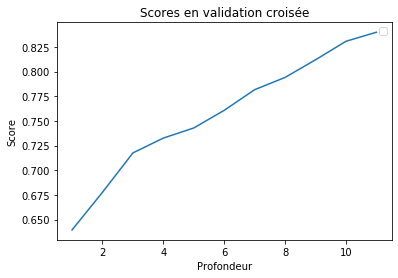

In [21]:
validationCroisee(data,5)

Les résultats sont concluants: Le score augmente bien lorsque la profondeur augmente.